In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Defining magnetorquer_out
Uses bdot algorithm to output torque required to detumble satellite

In [61]:
def magnetorquer_out(mag_field_str, ang_vel, gain):
    scalar_coef = -gain / np.dot(mag_field_str, mag_field_str)
    magnetic_dipoles = scalar_coef * np.cross(mag_field_str, ang_vel)
    return np.cross(magnetic_dipoles, mag_field_str)

In [64]:
b = np.array([5.8,5.8,5.8]) 
    # Earth's magnetic field strength, in nano Teslas
inertia_matrix = np.array([ # grams * square millimeters
    [1308846.485, -10374.412, -13883.462],
    [-10374.412, 1334376.646, -21514.642],
    [-13883.462,-21514.642, 671472.124]
])/1000000


In [65]:
np.dot(b,inertia_matrix)


array([7.45061394, 7.55442803, 3.68922932])

### Defining simulate_detumble
Simulates detumbling of satellite's angular velocity. Returns list of angular velocities corresponding to each time step. Gaussian noise is introduced in the calculation of curr_ang_vel.

In [122]:
initial_ang_vel_array = np.linspace(np.pi/60, np.pi/6, 30) # generate possible initial ang_vel's
b =np.array([5.8,5.8,5.8]) 
    # Earth's magnetic field strength, in nano Teslas
inertia_matrix = np.array([ # kg * square meters
    [1308846.485, -10374.412, -13883.462],
    [-10374.412, 1334376.646, -21514.642],
    [-13883.462,-21514.642, 671472.124]
])/1000000

def simulate_detumble(initial_ang_vel, gain, time, dt):    
    ang_vel_data = [initial_ang_vel] # radians / second
    for i in np.arange(len(np.arange(0, time + dt, dt))):
        curr_ang_vel = ang_vel_data[i]
        inverse_inertia_matrix = np.linalg.inv(inertia_matrix)
        ang_acceleration = magnetorquer_out(b, curr_ang_vel, gain) * inverse_inertia_matrix 
        # TBD: introduce gaussian noise to the calculation of our new angular velocity
        new_ang_vel = curr_ang_vel + ang_acceleration*dt # force is applied during entire time step
        ang_vel_data = np.append(ang_vel_data, new_ang_vel) # appends new_ang_vel, 
    return ang_vel_data

a = simulate_detumble(np.pi/60, 1, 300, 3)

AxisError: axisb: axis -1 is out of bounds for array of dimension 0

[array([929.46532538,  10.65405278,  30.79580424]),
 array([864.51961946,  20.96515241,  58.48725105]),
 array([804.71494823,  30.91332993,  83.38602429]),
 array([749.63975877,  40.48468015, 105.77260712]),
 array([698.91587941,  49.67045135, 125.89939834]),
 array([652.19577129,  58.46624868, 143.99351802]),
 array([609.16001015,  66.87133813, 160.25933331]),
 array([569.51497837,  74.88803953, 174.88073229]),
 array([532.99074977,  82.52119813, 188.02317109]),
 array([499.33915042,  89.77772577, 199.83551666]),
 array([468.33198086,  96.66620317, 210.45170569]),
 array([439.75938589, 103.1965364 , 219.99223798]),
 array([413.42835947, 109.37966075, 228.56552073]),
 array([389.16137347, 115.22728652, 236.2690786 ]),
 array([366.79511964, 120.75168149, 243.19064298]),
 array([346.1793555 , 125.96548561, 249.40913244]),
 array([327.17584525, 130.88155389, 254.99553528]),
 array([309.65738783, 135.51282403, 260.01370384]),
 array([293.50692483, 139.87220547, 264.5210695 ]),
 array([278.

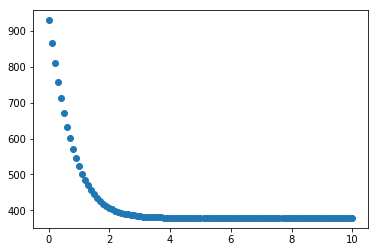

In [129]:
b =np.array([1,2,3])
inertia_matrix = np.array([ 
    [1308846.485, -10374.412, -13883.462],
    [-10374.412, 1334376.646, -21514.642],
    [-13883.462,-21514.642, 671472.124]
])/1000000 # kg * square meter
initial_ang_vel = np.array([5,2,5])
def detumble(initial_ang_vel, gain, time, dt):
    inverse_inertia_matrix = np.linalg.inv(inertia_matrix)
    ang_acceleration = np.matmul(inverse_inertia_matrix,(magnetorquer_out(b, initial_ang_vel, gain)))
    new_ang_vel = initial_ang_vel + ang_acceleration*dt
    return new_ang_vel

def simulation(start,end,initial_ang_vel,gain,dt):
    times = np.arange(start,end+dt,dt)
    vel_list = []
    vel_list_mag = []
    vel_list_x = []
    vel_list_y = []
    vel_list_z = []
    curr_vel = initial_ang_vel
    for t in times:
        curr_vel = detumble(curr_vel,gain,time,dt)
        vel_list.append(curr_vel)
            
    for i in vel_list:
        vel_list_x.append(i[0]) 
        vel_list_y.append(i[1])
        vel_list_z.append(i[2])
    for j in range(len(vel_list)):
        vel_list_mag.append(np.sqrt(vel_list_x[j]**2+vel_list_y[j]**2+vel_list_z[j]**2))
    plt.scatter(times,vel_list_mag)
    return vel_list
    #return vel_list    
        
simulation(0,10,np.array([1000,0,0]),1,0.1)        

In [56]:
(magnetorquer_out([1, 2, 3], [5, 2, 5], 1)).reshape((3,1)) 

array([[-3.28571429],
       [ 1.42857143],
       [ 0.14285714]])

In [84]:
[float(i)*5/100 for i in range(int(5/0.05)+1)]
time = 30 
dt = 0.5
times = [float(i)*time/int(time/dt) for i in range(int(time/dt)+1)]
times

np.arange(0,30.5,0.5)[3]

1.5

### Old Version
Originally used for brainstorming. Not complete.

In [8]:
time_step = 1 # seconds
time = 300 # seconds
curr_ang_vel = 10 # set initial
inertia_matrix = [ # grams * square millimeters
    [1308846.485, -10374.412, -13883.462],
    [-10374.412, 1334376.646, -21514.642],
    [-13883.462,-21514.642, 671472.124]
]
gain = 1.0
b = 100 # geomagnetic field: nano Teslsas
mu_0 = 4*np.pi*(10**-7)

for i in np.arange(0, time, time_step):
    initial_ang_vel = ang_vel_data[len(ang_vel_data)-1]
    inverse_inertia_matrix = ...
    ang_acceleration = magnetorquer_out(..., curr_ang, ...) * inverse_inertia_matrix 
    
    # introduce gaussian noise to the calculation of our new angular velocity
    curr_ang_vel = initial_ang_vel + ang_acceleration*time_step # force is applied during entire time_step
    
    
    np.append(ang_vel_data, curr_ang_vel) # adds ang_vel data point to list

plt.plot(np.arange(0, time, time_step), ang_vel_data) # generate plot

NameError: name 'ang_vel_data' is not defined

In [9]:
4*np.pi*(10**-7)

1.2566370614359173e-06